In [4]:
!pip install yfinance

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
stocks = input("Enter the name of the stock: ")
data = yf.download(stocks, "2008-01-01", "2023-01-18")
data.head()

Enter the name of the stock: GC=F
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2008-01-02,857.000000,857.799988,846.400024,848.700012,130
2008-01-03,866.400024,865.500000,856.299988,863.000000,181
2008-01-04,863.099976,865.500000,860.200012,861.400024,28
2008-01-07,859.599976,860.900024,857.400024,860.900024,4
2008-01-08,878.000000,879.400024,861.599976,861.599976,21


In [7]:
data.shape

(3784, 5)

In [8]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
count,3784.000000,3784.000000,3784.000000,3784.000000,3784.000000
mean,1380.207479,1387.732347,1372.490196,1380.378013,5437.357294
std,295.721493,296.917907,294.373856,295.591335,28816.012350
min,704.900024,715.500000,681.000000,705.000000,0.000000
25%,1200.674957,1206.649963,1195.800049,1200.800018,44.000000
50%,1310.800049,1315.800049,1306.250000,1310.850037,147.000000
75%,1650.699982,1660.724976,1640.049988,1651.699982,482.000000
max,2051.500000,2072.000000,2040.000000,2053.600098,386334.000000


KeyError: 'Price Series'

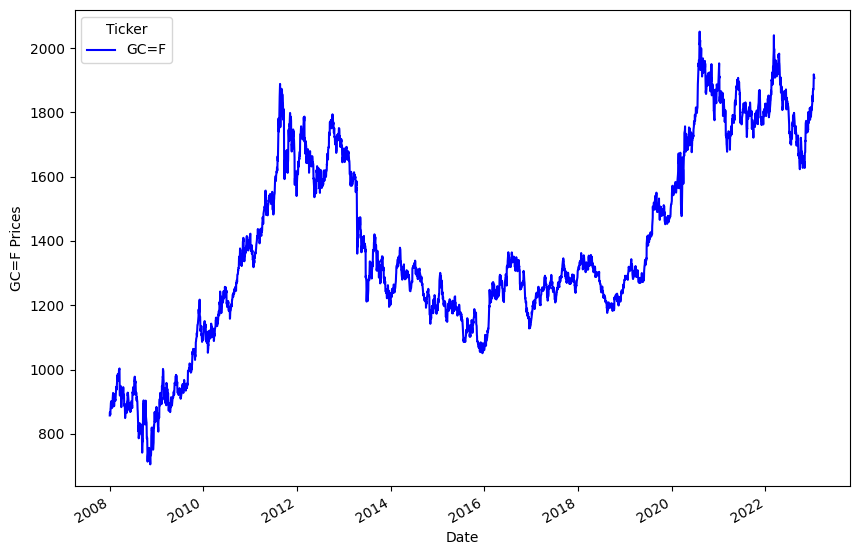

In [11]:
data.Close.plot(figsize=(10,7), color='b')
plt.ylabel("{} Prices".format(stocks))
plt.title("{Price Series}".format(stocks))
plt.show()

<ipython-input-12-52f31bd8d8ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"], kde=True)


<Axes: ylabel='Density'>

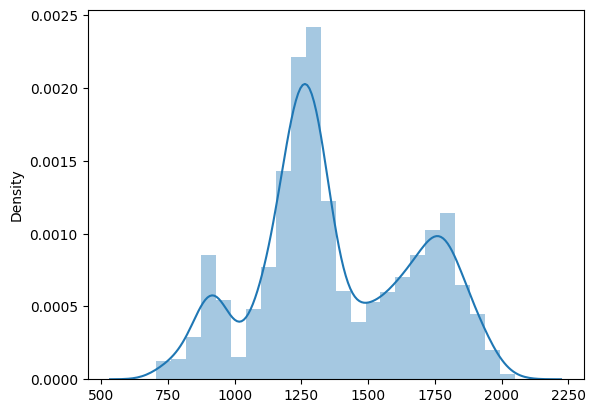

In [12]:
sns.distplot(data["Close"], kde=True)

<ipython-input-13-f105f0b633a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: ylabel='Density'>

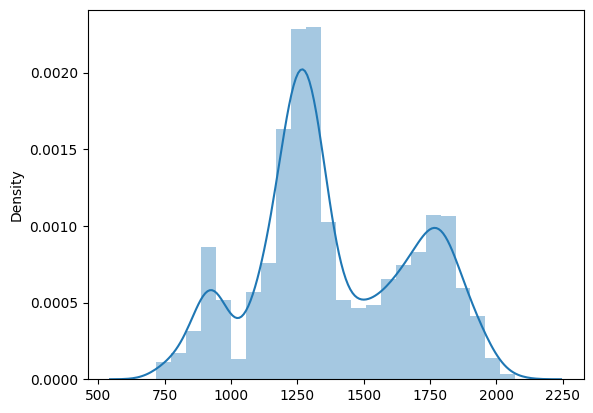

In [13]:
sns.distplot(data["High"])

<ipython-input-14-daae21fed2ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: ylabel='Density'>

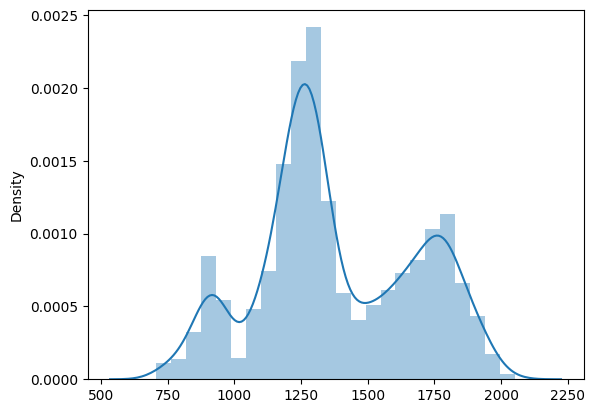

In [14]:
sns.distplot(data["Open"])

In [15]:
X = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [16]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
pred1 = linear_model.predict(X_test)

In [17]:
#MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred1)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

MSE:  25.50584744918206
RMSE:  5.050331419736932


In [18]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.920e+04, tolerance: 2.607e+04
  model = cd_fast.enet_coordinate_descent(


In [19]:
def mse_k(y_test, prediction):
  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_test, prediction)
  rmse = np.sqrt(mse)
  print("MSE: ", mse)
  print("RMSE: ", rmse)

In [20]:
#lasso
mse_k(y_test, la_p)

MSE:  30.277968941726517
RMSE:  5.502542043612799


In [21]:
#ridge
mse_k(y_test, ri_p)

MSE:  25.505905008034706
RMSE:  5.050337118256039


**Support Vector Machine (SVM)** is a powerful supervised learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that maximizes the margin between different classes.

Equation of the hyperplane (Regression Model)
$$
y = w^T x + b
$$
x  = X_train (features like Close_Lag1, Close_Lag2, etc.).
y  = y_train (actual stock prices).


SVR Optimization Problem (Epsilon-Support Vector Regression)
$$
\min_{w, b, \xi, \xi^*} \frac{1}{2} ||w||^2 + C \sum (\xi_i + \xi^*_i)
$$

Kernel Trick
$$
K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
$$




In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#train
svr = SVR(kernel="rbf", C=100000, gamma = 0.1)
svr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100000, gamma=0.1)

In [30]:
y_pred_svr = svr.predict(X_test)
mse_k(y_test, y_pred_svr) #MSE is so big even with SVM

MSE:  90207.38178291247
RMSE:  300.34543742649475
